# Task 5.1. Binaryisation based on histogram 1.1 - 1.9
---
***Author: Piotr Skalski***

## Imports

In [1]:
import numpy as np
import cv2
import os

import matplotlib.pyplot as plt
%matplotlib inline

## Settings

In [3]:
SOURCE_DIR = "./../data/"
IMAGE_NAME = "coins.bmp"

## Loading images

In [4]:
# building path to file
image_path = os.path.join(SOURCE_DIR, IMAGE_NAME)
# loading files
image = cv2.imread(image_path, 0)

## Display the basic histogram

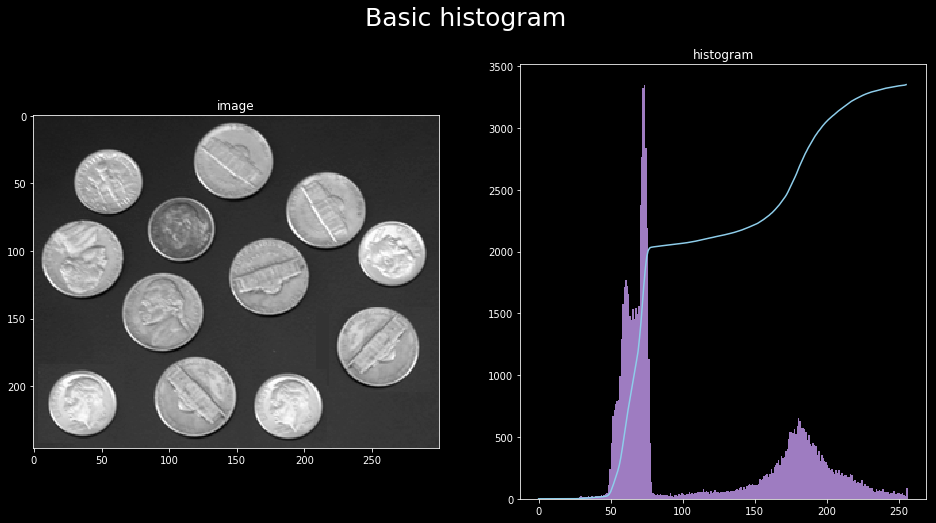

In [5]:
# creation of a cumulative histogram
hist,bins = np.histogram(image.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_base = cdf * hist.max()/ cdf.max()

plt.style.use('dark_background')
fig = plt.figure(figsize=(16,8))
fig.suptitle('Basic histogram', fontsize = 25)
ax1 = fig.add_subplot(121)
ax1.imshow(image, 'gray')
ax1.set_title("image")

ax2 = fig.add_subplot(122)
ax2.hist(image.ravel(), 256, [0,256], color = '#9E7CC1')
ax2.plot(cdf_base, color = '#8ECDEA')
ax2.set_title("histogram")

plt.show()

## Image Thresholding

### Settings

In [22]:
THRESHOLD = 80
THRESH_TYPES = [
    cv2.THRESH_BINARY,
    cv2.THRESH_BINARY_INV,
    cv2.THRESH_TRUNC,
    cv2.THRESH_TOZERO,
    cv2.THRESH_TOZERO_INV,
]
THRESH_NAMES = [
    "THRESH_BINARY",
    "THRESH_BINARY_INV",
    "THRESH_TRUNC",
    "THRESH_TOZERO",
    "THRESH_TOZERO_INV",
]

## Implementation

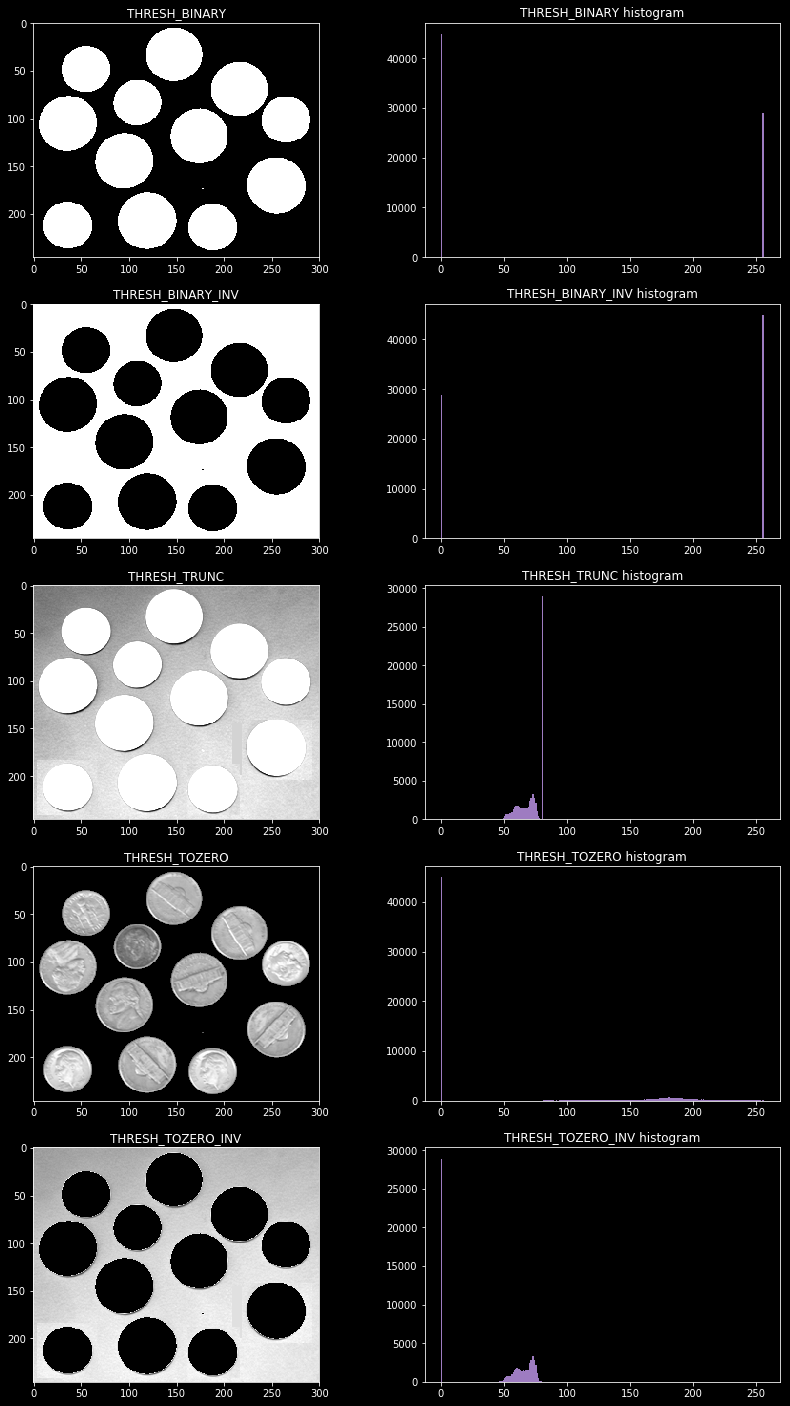

In [23]:
plt.style.use('dark_background')
f, axarr = plt.subplots(5, 2, figsize=(14, 25))
for index, (type_, name) in enumerate(zip(THRESH_TYPES, THRESH_NAMES)):
    ret, image_thresh = cv2.threshold(image, THRESHOLD, 255, type_)
    axarr[index, 0].imshow(image_thresh, 'gray')
    axarr[index, 0].set_title(name)
    axarr[index, 1].hist(image_thresh.ravel(), 256, [0,256], color = '#9E7CC1')
    axarr[index, 1].set_title("{} histogram".format(name))

## Noises

### Settings

In [24]:
SOURCE_DIR = "./../data/"
IMAGE_NAMES = [
    "figura.png",
    "figura2.png",
    "figura3.png",
    "figura4.png"
]

### Loading images

In [25]:
# building paths to files
image_paths = [os.path.join(SOURCE_DIR, image_name) for image_name in IMAGE_NAMES]
# loading files
images = [cv2.imread(path, 0) for path in image_paths]

### Display histograms

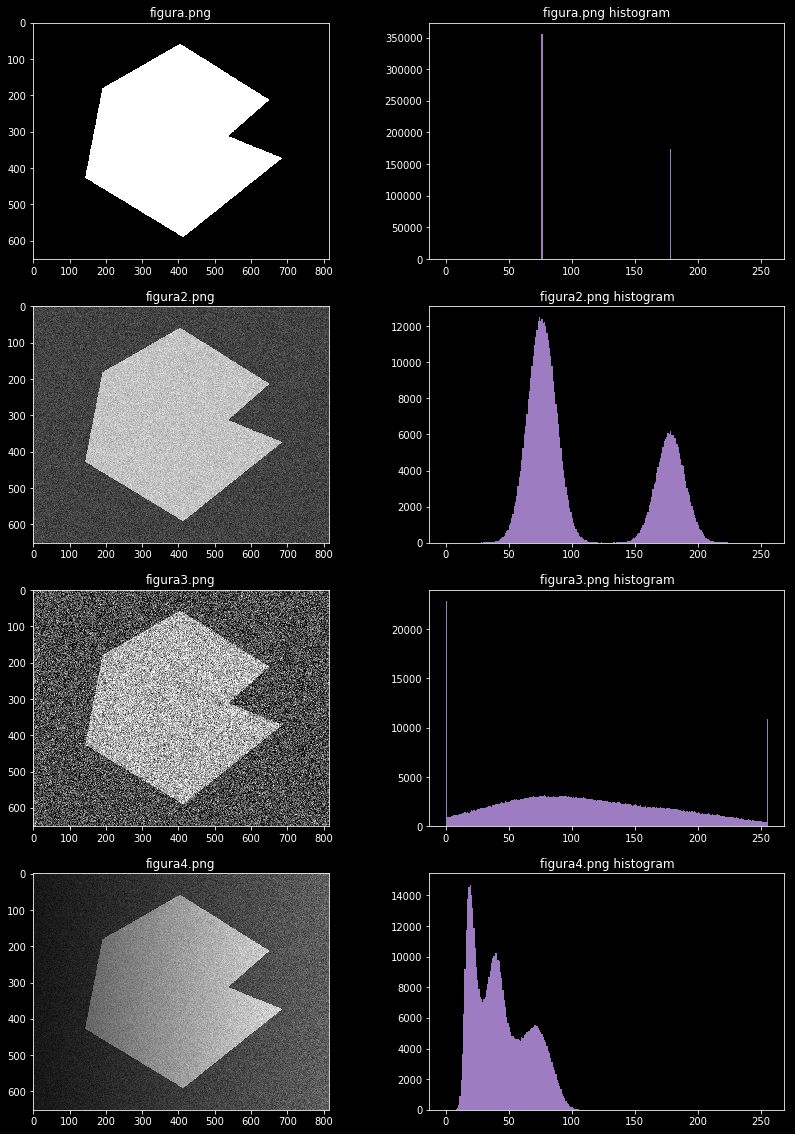

In [30]:
f, axarr = plt.subplots(4, 2, figsize=(14, 20))
for index, image in enumerate(images):
    image_name = IMAGE_NAMES[index]
    axarr[index, 0].imshow(image,'gray')
    axarr[index, 0].set_title(image_name)
    axarr[index, 1].hist(image.ravel(), 256, [0,256], color = '#9E7CC1')
    axarr[index, 1].set_title("{} histogram".format(image_name))

## Otsu’s Binarization

## Settings

In [38]:
SOURCE_DIR = "./../data/"
IMAGE_NAME = "coins.bmp"

### Loading images

In [39]:
# building path to file
image_path = os.path.join(SOURCE_DIR, IMAGE_NAME)
# loading files
image = cv2.imread(image_path, 0)

In [40]:
ret,th = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print("Threshold value: {}".format(ret))

Threshold value: 126.0


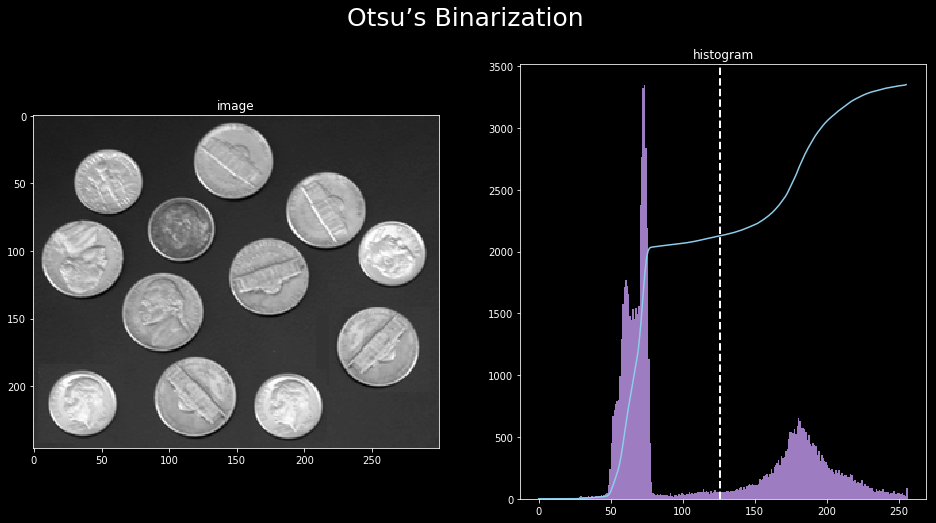

In [44]:
# creation of a cumulative histogram
hist,bins = np.histogram(image.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_base = cdf * hist.max()/ cdf.max()

plt.style.use('dark_background')
fig = plt.figure(figsize=(16,8))
fig.suptitle('Otsu’s Binarization', fontsize = 25)
ax1 = fig.add_subplot(121)
ax1.imshow(image, 'gray')
ax1.set_title("image")

ax2 = fig.add_subplot(122)
ax2.hist(image.ravel(), 256, [0,256], color = '#9E7CC1')
ax2.plot(cdf_base, color = '#8ECDEA')
ax2.axvline(x=ret, color="#FFFFFF", linestyle='dashed', linewidth=2)
ax2.set_title("histogram")

plt.show()

## Resources

1. [Simple Thresholding](https://docs.opencv.org/3.4.3/d7/d4d/tutorial_py_thresholding.html)
2. [OpenCV & Python – La binarizzazione di Otsu](http://www.meccanismocomplesso.org/opencv-python-otsu-binarization-thresholding/)